In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as og

dataset = pd.read_csv("Speed+Dating+Data.csv", encoding="ISO-8859-1")

## Exploratory and Cleaning dataset

In [18]:
# Basic stats
print("Number of rows and columns : {}".format(dataset.shape))#[0]))
print()

print("Display the first 5 raws of dataset: ")
display(dataset.head())
print()

print("Number of duplicated values: ")
display(dataset.duplicated().sum())
print()

print("Number of unique values: ")
display(dataset.nunique())
print()

print("Percentage of missing values: ")
display((100 * dataset.isnull().sum() / dataset.shape[0]).sort_values)


Number of rows and columns : (8378, 195)

Display the first 5 raws of dataset: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN



Number of duplicated values: 


0


Number of unique values: 


iid         551
id           22
gender        2
idg          44
condtn        2
           ... 
attr5_3       9
sinc5_3       9
intel5_3      7
fun5_3       10
amb5_3        9
Length: 195, dtype: int64


Percentage of missing values: 


<bound method Series.sort_values of iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64>

In [19]:
# Define a threshold (e.g., 20%)
threshold = 20
missing_percentage = 100 * dataset.isnull().sum() / dataset.shape[0]

# Identify columns with missing values greater than the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop these columns from the dataset
dataset_cleaned = dataset.drop(columns=columns_to_drop)
#dataset_cleaned = dataset
# Display the result
print("Original dataset:")
display(dataset.head())
print("\nColumns with more than {}% missing values:".format(threshold))
display(columns_to_drop)
print("\nCleaned dataset:")
display(dataset_cleaned.head())

Original dataset:


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN



Columns with more than 20% missing values:


Index(['positin1', 'undergra', 'mn_sat', 'tuition', 'income', 'expnum',
       'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
       'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr1_s',
       'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s',
       'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2',
       'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'attr4_2', 'sinc4_2',
       'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2',
       'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr5_2', 'sinc5_2',
       'intel5_2', 'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3',
       'numdat_3', 'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3',
       'amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3',
       'amb7_3', 'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3',
       'amb4_3', 'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3',
       'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3'


Cleaned dataset:


,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,4,1,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,3,2,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,10,3,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,5,4,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,7,5,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [20]:
# gender : Female = 0 , Male = 1
dataset_cleaned['gender'] = dataset_cleaned['gender'].map({ 0 : "Female", 1 : "Male"})
# match : No = 0 , Yes = 1
dataset_cleaned['match'] = dataset_cleaned['match'].map({ 0 : "No", 1 : "Yes"})
# Race
dataset_cleaned["race"] = dataset_cleaned["race"].apply(lambda x:
                                  'Black/African American' if x == 1
                                  else 'European/Caucasian-American' if x == 2
                                  else 'Latino/Hispanic American' if x == 3
                                  else 'Asian/Pacific Islander/Asian-American' if x == 4
                                  else 'Native American' if x == 5
                                  else 'Other')
# goal
dataset_cleaned["goal"] = dataset_cleaned["goal"].apply(lambda x:
                                  'Seemed like a fun night out' if x == 1
                                  else 'To meet new people' if x == 2
                                  else 'To get a date' if x == 3
                                  else 'Looking for a serious relationship' if x == 4
                                  else 'To say I did it' if x == 5
                                  else 'Other')
# date
dataset_cleaned["date"] = dataset_cleaned["date"].apply(lambda x:
                                  'Several times a week' if x == 1
                                  else 'Twice a week' if x == 2
                                  else 'Once a week' if x == 3
                                  else 'Twice a month' if x == 4
                                  else 'Once a month' if x == 5
                                  else 'Several times a year' if x == 6
                                  else 'Almost never' if x == 7
                                  else 'Other')
# go out
# dataset_cleaned["go out"] = dataset_cleaned["go out"].apply(lambda x:
#                                   'Several times a week' if x == 1
#                                   else 'Twice a week' if x == 2
#                                   else 'Once a week' if x == 3
#                                   else 'Twice a month' if x == 4
#                                   else 'Once a month' if x == 5
#                                   else 'Several times a year' if x == 6
#                                   else 'Almost never' if x == 7
#                                   else 'Other')
# Carrer
dataset_cleaned["career_c"] = dataset_cleaned["career_c"].apply(lambda x:
                                  'Lawyer' if x == 1
                                  else 'Academic/Research' if x == 2
                                  else 'Psychologist' if x == 3
                                  else 'Doctor/Medicine' if x == 4
                                  else 'Engineer' if x == 5
                                  else 'Creative Arts/Entertainment' if x == 6
                                  else 'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin' if x == 7
                                  else 'Real Estate' if x == 8
                                  else 'International/Humanitarian Affairs' if x == 9
                                  else 'Undecided' if x == 10
                                  else 'Social Work' if x == 11
                                  else 'Speech Pathology' if x == 12
                                  else 'Politics' if x == 13
                                  else 'Pro sports/Athletics' if x == 14
                                  else 'Journalism' if x == 16
                                  else 'Architecture' if x == 17
                                  else 'Other')


## Data Analysis and Visualization

Very well balanced dataset between Male and Female

In [21]:
dataset_cleaned['gender'].value_counts()


gender
Male      4194
Female    4184
Name: count, dtype: int64

In general, Participants are between 22 and 30 years old

<Axes: xlabel='age', ylabel='Count'>

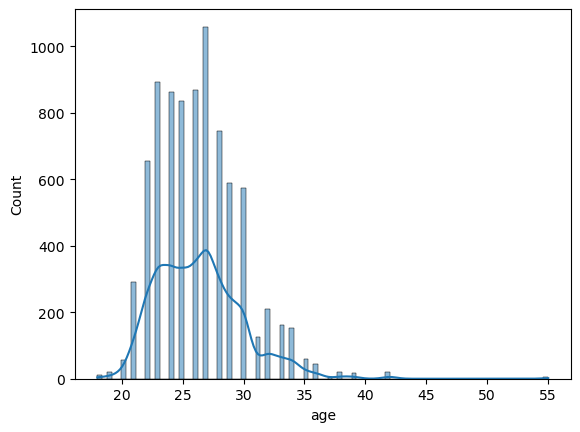

In [22]:
sns.histplot(data=dataset_cleaned, x="age", kde=True)

In [23]:
# Distribution of each numeric variable
num_features = ["age"]
for f in num_features:
    fig = px.histogram(
        dataset_cleaned, f, color="gender", facet_row="gender", histnorm="probability")
    fig.show()

In general, Female are younger than Male

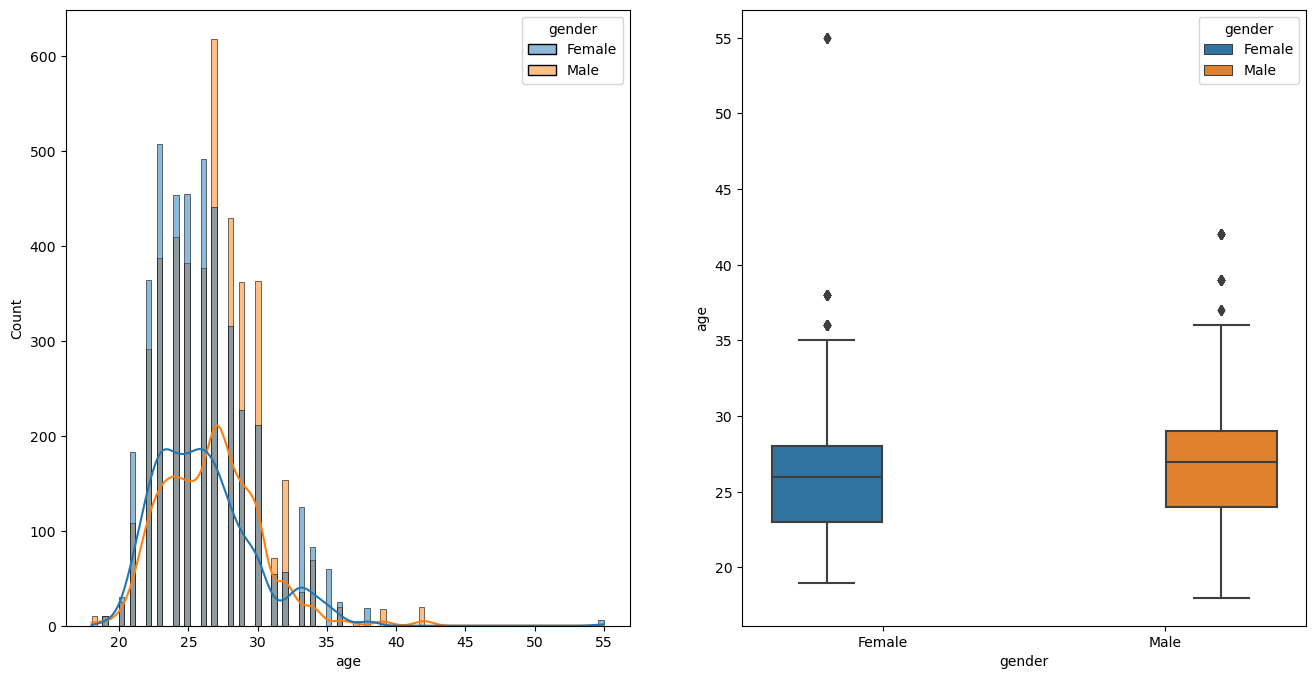

In [24]:

figure, axes = plt.subplots(1, 2, figsize=(16,8))
sns.histplot(data=dataset_cleaned, x="age",  hue="gender", ax=axes[0], kde=True);
sns.boxplot(data=dataset_cleaned, x="gender", y="age", hue='gender', ax=axes[1]);

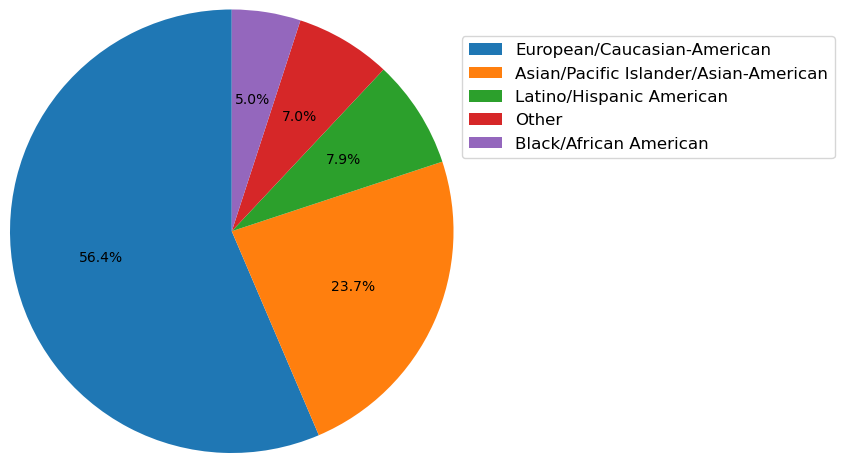

In [25]:

races = dataset_cleaned["race"].value_counts()

plt.figure()
plt.pie(races.values, labels=['','','','',''],
       autopct='%1.1f%%',
       startangle=90,
       radius=1.5)
plt.legend(labels = races.index, bbox_to_anchor=(1.1, 1.05), fontsize='large')
plt.show()

/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



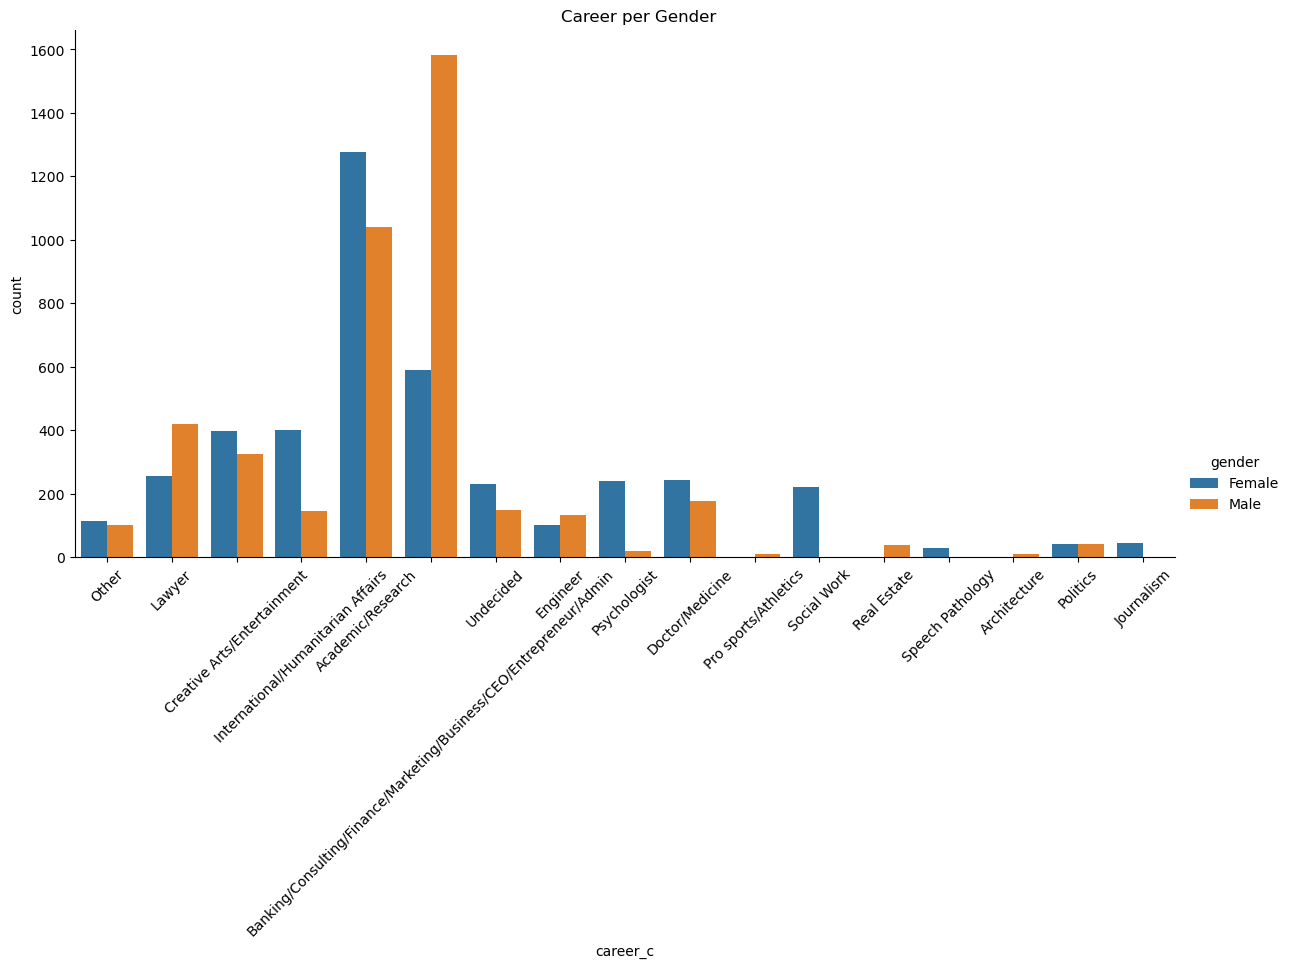

In [26]:
# Create the catplot
ax = sns.catplot(data=dataset_cleaned, x='career_c', kind='count', hue='gender', height=6, aspect=2)

# Rotate x-axis labels
ax.set_xticklabels(rotation=45)

# Set the title of the plot
ax.fig.suptitle('Career per Gender', y=1.01)

# Show the plot
plt.show()

# Why do participants attend the event?

Only 3.6% of participants are looking for a serious relationship. Most of them participated to meet new people and for a fun night out

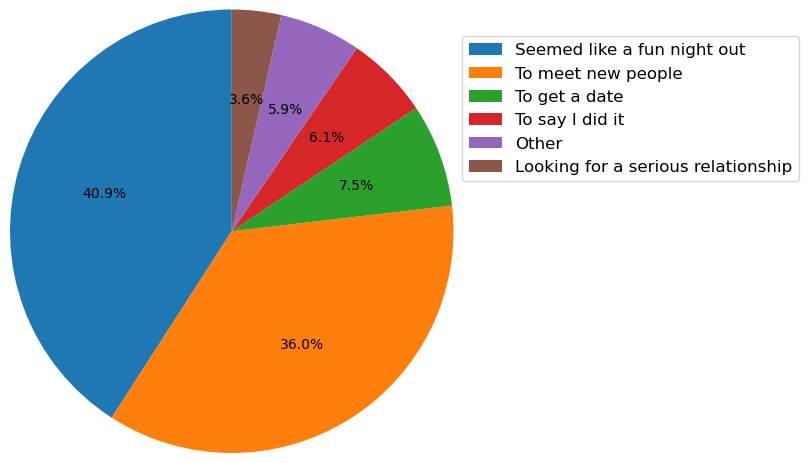

In [27]:
goals = dataset_cleaned["goal"].value_counts()

plt.figure()
plt.pie(goals.values, labels=['','','','','',''],
       autopct='%1.1f%%',
       startangle=90,
       radius=1.5)
plt.legend(labels = goals.index, bbox_to_anchor=(1.1, 1.05), fontsize='large')
plt.show()

## What makes people interested into each other

In [29]:
# Identify relevant columns for mutual interest
# Assuming 'dec_o' represents the decision by partner and 'dec' by the participant
Mutual_interest = ['dec', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']

# Extract the relevant columns from the dataset
relevant_data = dataset_cleaned[Mutual_interest]

# Check for missing values
missing_values = relevant_data.isnull().sum()

missing_values


dec           0
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
shar_o     1076
dtype: int64

In [30]:
# Drop rows with missing values for the initial analysis
cleaned_data = relevant_data.dropna()

# Calculate correlation between attributes and decisions
correlation_matrix = cleaned_data.corr().round(2)

# Extract relevant correlations
decision_correlations = correlation_matrix[['dec', 'dec_o']]
decision_correlations


,dec,dec_o
dec,1.00,-0.06
dec_o,-0.06,1.00
attr_o,-0.05,0.49
sinc_o,0.08,0.21
intel_o,0.09,0.21
fun_o,0.05,0.41
amb_o,0.06,0.18
shar_o,0.06,0.40


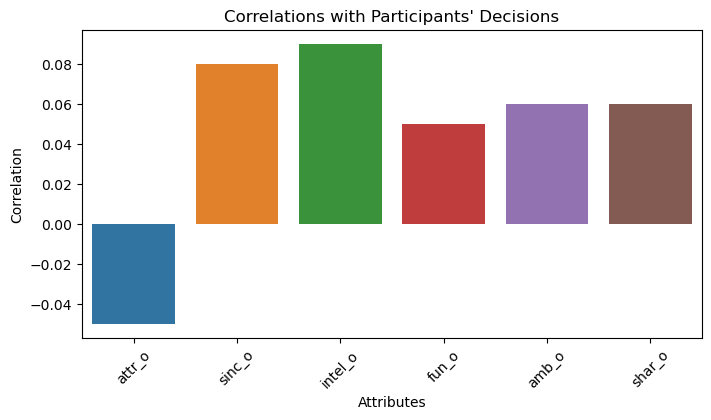

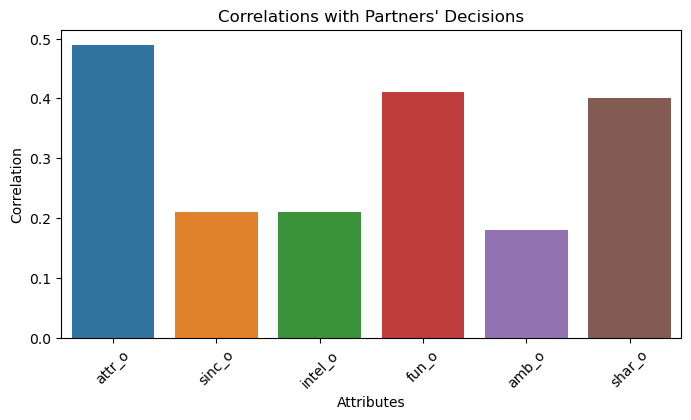

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to create correlation bar plots
def plot_correlations(correlations, title):
    plt.figure(figsize=(8, 4))
    sns.barplot(x=correlations.index, y=correlations.values)
    plt.title(title)
    plt.xlabel('Attributes')
    plt.ylabel('Correlation')
    plt.xticks(rotation=45)
    plt.show()


# Extract the relevant correlations for participants' decisions
participant_correlations = decision_correlations['dec'].drop(['dec', 'dec_o'])
partner_correlations     = decision_correlations['dec_o'].drop(['dec', 'dec_o'])

# Plot correlations for participants' decisions
plot_correlations(participant_correlations, 'Correlations with Participants\' Decisions')

# Plot correlations for partners' decisions
plot_correlations(partner_correlations, 'Correlations with Partners\' Decisions')


Attributes rated by the partner (attr_o, sinc_o, intel_o, fun_o, amb_o, shar_o) have a stronger correlation with the partner's decision (dec_o) compared to the participant's own decision (dec). 

Notably, the partner's decision is most strongly correlated with the perceived attractiveness (attr_o), followed by fun (fun_o) and shared interests (shar_o).


## What are the least desirable attributes in opposite sex partner

In [37]:
# Filter the dataset to include only female participants (gender = 0)
female_participants = dataset_cleaned[dataset_cleaned['gender'] == "Female"]

# Extract the relevant columns for female participants
female_relevant_data = female_participants[['dec', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]

# Drop rows with missing values
female_cleaned_data = female_relevant_data.dropna()

# Calculate correlation between attributes and decisions for female participants
female_correlation_matrix = female_cleaned_data.corr().round(2)

# Extract relevant correlations
female_decision_correlations = female_correlation_matrix[['dec', 'dec_o']]
female_decision_correlations

,dec,dec_o
dec,1.00,-0.05
dec_o,-0.05,1.00
attr_o,-0.05,0.52
sinc_o,0.10,0.19
intel_o,0.09,0.21
fun_o,0.06,0.40
amb_o,0.06,0.21
shar_o,0.08,0.39


In [38]:
# Filter the dataset to include only female participants (gender = 0)
male_participants = dataset_cleaned[dataset_cleaned['gender'] == "Male"]

# Extract the relevant columns for female participants
male_relevant_data = male_participants[['dec', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]

# Drop rows with missing values
male_cleaned_data = male_relevant_data.dropna()

# Calculate correlation between attributes and decisions for female participants
male_correlation_matrix = male_cleaned_data.corr().round(2)

# Extract relevant correlations
male_decision_correlations = male_correlation_matrix[['dec', 'dec_o']]
male_decision_correlations

,dec,dec_o
dec,1.00,-0.05
dec_o,-0.05,1.00
attr_o,-0.04,0.44
sinc_o,0.08,0.22
intel_o,0.07,0.24
fun_o,0.05,0.42
amb_o,0.05,0.18
shar_o,0.05,0.41


In [39]:
# Define a function to create correlation bar plots for female participants
def plot_female_correlations(correlations, title):
    plt.figure(figsize=(8, 4))
    sns.barplot(x=correlations.index, y=correlations.values)
    plt.title(title)
    plt.xlabel('Attributes')
    plt.ylabel('Correlation')
    plt.xticks(rotation=45)
    plt.show()

In [52]:
# Extract the relevant correlations for female participants' decisions
female_participant_correlations = female_decision_correlations['dec'].drop(['dec', 'dec_o'])
female_partner_correlations     = female_decision_correlations['dec_o'].drop(['dec', 'dec_o'])

# Extract the relevant correlations for male participants' decisions
male_participant_correlations = male_decision_correlations['dec'].drop(['dec', 'dec_o'])
male_partner_correlations     = male_decision_correlations['dec_o'].drop(['dec', 'dec_o'])

# Plot correlations for male partners' decisions
#plot_female_correlations(female_partner_correlations, 'Correlations with Male Partners\' Decisions')
#plot_female_correlations(male_partner_correlations, 'Correlations with Female Partners\' Decisions')

# Plot correlations for female participants' decisions
#plot_female_correlations(female_participant_correlations, 'Correlations with Female Participants\' Decisions')

# Plot correlations for female participants' decisions
#plot_female_correlations(male_participant_correlations, 'Correlations with Male Participants\' Decisions')

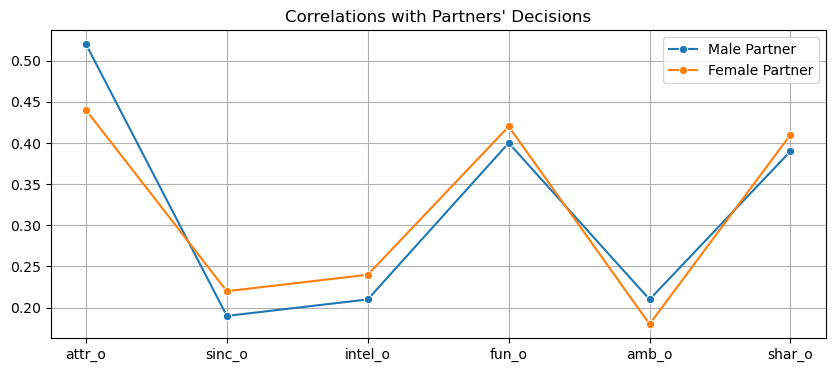

In [53]:
# Plot the success rate by order of meetings
plt.figure(figsize=(10, 4))
sns.lineplot(x=female_partner_correlations.index, y=female_partner_correlations.values, marker='o', label='Male Partner')
sns.lineplot(x=male_partner_correlations.index, y=male_partner_correlations.values, marker='o', label='Female Partner')
plt.title('Correlations with Partners\' Decisions')
plt.xlabel('')
plt.ylabel('')
#plt.xticks(range(1, 23))
plt.grid(True)
plt.show()

Both Men and Women care less about Sincerity, ambition and intelligence

## Matching

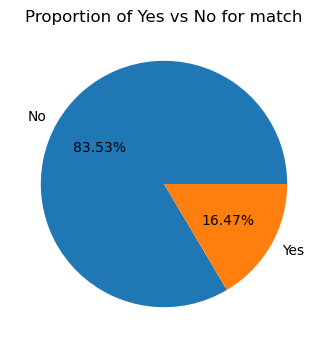

In [74]:

match_df = dataset_cleaned['match'].value_counts(dropna=False)
plt.figure(figsize=(8,4))
plt.pie(match_df.values, labels = match_df.index, autopct = "%.2f%%")
plt.title("Proportion of Yes vs No for match")
plt.show()

<Axes: xlabel='dec', ylabel='count'>

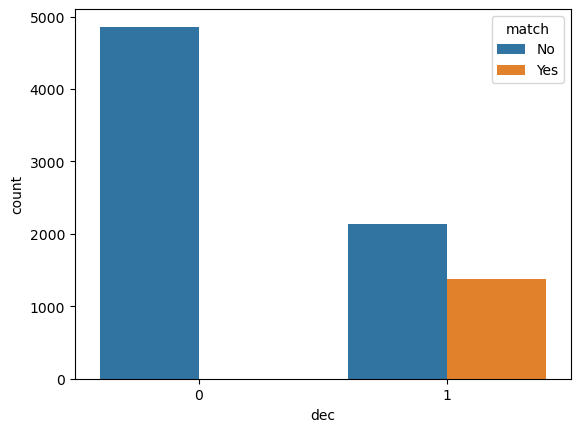

In [75]:
sns.countplot(data = dataset_cleaned, x ='dec', hue='match')

Positive decisions not always lead to a date.

Less than 50% of positive decisions lead to a date

In [ ]:
#sns.countplot(data = dataset_cleaned, x ='dec_o', hue='match')

## How do people think attractiveness is in potential mate selection vs its real impact?

 we can compare the self-assessed importance of attractiveness with the actual decisions made during speed dating.

 Steps for Analysis:
Self-assessed Importance: Identify columns where participants rate the importance of attractiveness in a potential mate (likely labeled with attr or similar).
Actual Impact: Correlate the ratings of attractiveness (attr_o) with the decision to go on a second date (dec and dec_o).

In [50]:

# Extract relevant columns for attractiveness ratings and decisions
attractiveness_impact_data = dataset_cleaned[['attr_o', 'dec', 'dec_o']]

# Drop rows with missing values
cleaned_attractiveness_data = attractiveness_impact_data.dropna()

# Calculate correlations between attractiveness ratings and decisions
correlation_attr_dec   = cleaned_attractiveness_data['attr_o'].corr(cleaned_attractiveness_data['dec'])
correlation_attr_dec_o = cleaned_attractiveness_data['attr_o'].corr(cleaned_attractiveness_data['dec_o'])

# Display the correlations
correlations = {
    'Attractiveness vs Decision (Self)': correlation_attr_dec,
    'Attractiveness vs Decision (Partner)': correlation_attr_dec_o}

correlations_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

#import ace_tools as tools; tools.display_dataframe_to_user(name="Attractiveness Impact Correlations", dataframe=correlations_df)

correlations_df

,Correlation
Attractiveness vs Decision (Self),-0.059360
Attractiveness vs Decision (Partner),0.486885


Perceived Impact: Participants' own decisions (dec) have a slight negative correlation with their partners' attractiveness ratings. This suggests that participants may not perceive attractiveness as very important when deciding on a second date for themselves.

Actual Impact: Partners' decisions (dec_o) show a strong positive correlation with participants' attractiveness ratings. This indicates that attractiveness has a significant actual impact on the partners' decisions to go on a second date.

This disparity suggests that while participants may not prioritize attractiveness as highly in their own decision-making, it has a substantial real impact on how they are perceived and selected by their partners.

# What's the importance of Race Similarity?

/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



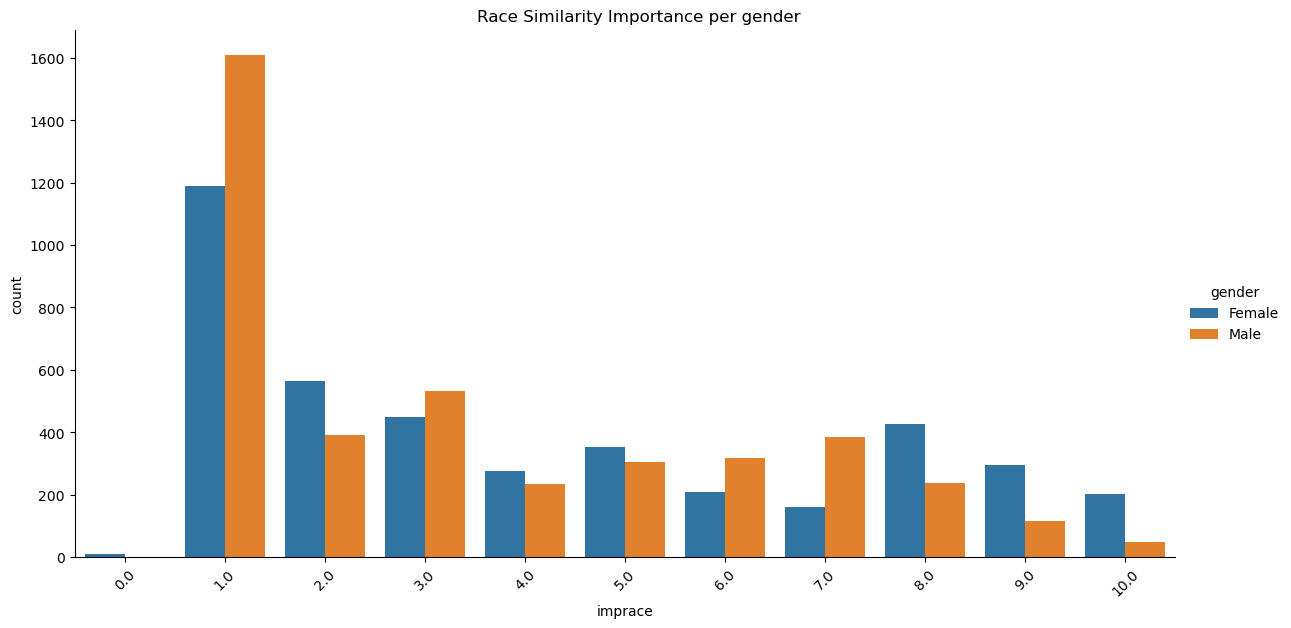

In [70]:
ax = sns.catplot(data = dataset_cleaned, x='imprace', kind ='count', hue = 'gender', height = 6, aspect = 2)
ax.set_xticklabels(rotation=45)
ax.fig.suptitle('Race Similarity Importance per gender', y = 1.01)
plt.show()

# What's the importance of Religion Background Similarity?

/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



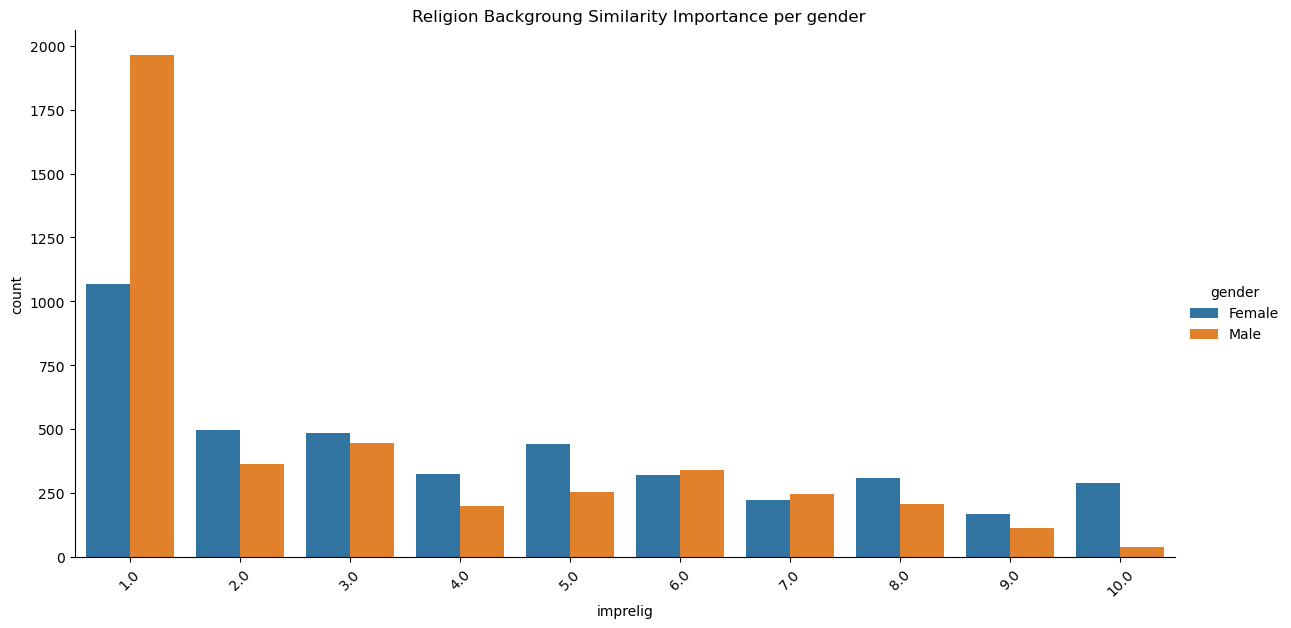

In [71]:
ax = sns.catplot(data = dataset_cleaned, x='imprelig', kind ='count', hue = 'gender', height = 6, aspect = 2)
ax.set_xticklabels(rotation=45)
ax.fig.suptitle('Religion Backgroung Similarity Importance per gender', y = 1.01)
plt.show()

The most of people do not care about belonging to the same race or sharing the same religion

## In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

In [72]:
# Identify relevant columns: 'order' (order of meetings) and 'dec' (decision for a second date)
order_decision_data = dataset_cleaned[['order', 'dec']]

# Drop rows with missing values in the relevant columns
cleaned_order_decision_data = order_decision_data.dropna()

# Group the data by 'order' and calculate the success rate of getting a second date
success_rate_by_order = cleaned_order_decision_data.groupby('order')['dec'].mean()
success_rate_by_order

order
1     0.499093
2     0.393829
3     0.421053
4     0.446461
5     0.422868
6     0.441774
7     0.416342
8     0.409449
9     0.444223
10    0.419831
11    0.400538
12    0.373656
13    0.405914
14    0.416667
15    0.401198
16    0.398026
17    0.375494
18    0.395257
19    0.477528
20    0.395833
21    0.337209
22    0.386364
Name: dec, dtype: float64

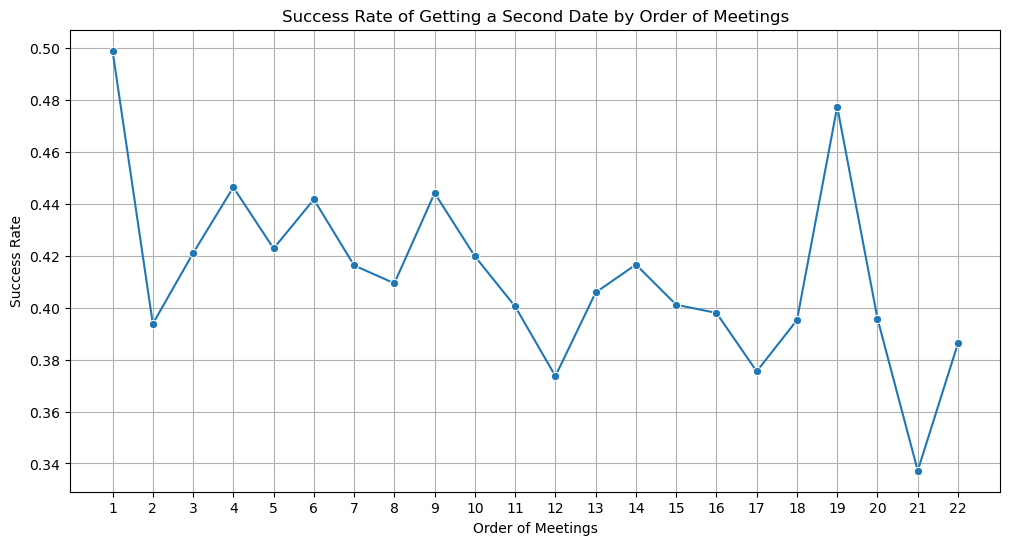

In [73]:
# Plot the success rate by order of meetings
plt.figure(figsize=(12, 6))
sns.lineplot(x=success_rate_by_order.index, y=success_rate_by_order.values, marker='o')
plt.title('Success Rate of Getting a Second Date by Order of Meetings')
plt.xlabel('Order of Meetings')
plt.ylabel('Success Rate')
plt.xticks(range(1, 23))
plt.grid(True)
plt.show()

The success rates for getting a second date based on the order of meetings are as follows:

1st Order: 49.91%
Last Order (22nd): 38.64%

Conclusion:
The highest success rate for getting a second date is observed when the participant is the first date of the night (49.91%).

The success rate generally decreases as the order increases, with the last date of the night (22nd order) having a success rate of 38.64%.

The success rate for getting a second date is highest when the participant is the first speed date of the night and generally decreases as the order progresses. This suggests that it is indeed better to be someone's first speed date because it tends to result in a higher likelihood of getting a second date compared to being their last speed date.

## Are shared interests more important than a shared racial background?

In [51]:
# Identify columns related to racial background
# Inspect the column names for relevant keywords like 'race'
columns = dataset_cleaned.columns
race_columns = [col for col in columns if 'race' in col]

race_columns

['samerace', 'race_o', 'race', 'imprace']

In [59]:
# Extract the relevant columns for the analysis
relevant_columns_race_interests = ['dec', 'dec_o', 'shar_o', 'samerace']
race_interests_data = dataset_cleaned[relevant_columns_race_interests]

# Drop rows with missing values for the initial analysis
cleaned_race_interests_data = race_interests_data.dropna()

# Calculate correlation between attributes and decisions
correlation_race_interests = cleaned_race_interests_data.corr().round(3)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Race and Shared Interests Correlations", dataframe=correlation_race_interests)

correlation_race_interests

,dec,dec_o,shar_o,samerace
dec,1.000,-0.061,0.058,0.016
dec_o,-0.061,1.000,0.401,0.027
shar_o,0.058,0.401,1.000,0.061
samerace,0.016,0.027,0.061,1.000


Correlations with Participants' Decisions (dec):
Shared Interests (shar_o): 0.058
Shared Racial Background (samerace): 0.016

Correlations with Partners' Decisions (dec_o):
Shared Interests (shar_o): 0.401
Shared Racial Background (samerace): 0.027


For Participants' Decisions: Shared interests have a higher positive correlation (0.058) compared to shared racial background (0.016).

For Partners' Decisions: Shared interests also show a significantly higher positive correlation (0.401) compared to shared racial background (0.027).

This indicates that shared interests are more important than a shared racial background in influencing both participants' and their partners' decisions in the context of speed dating

In [ ]:
# !pip install lazypredict
# from lazypredict.Supervised import LazyClassifier

# clf = LazyClassifier(verbose=0,predictions=True)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

# predictions.head()

# from sklearn.metrics import classification_report
# for i in predictions.columns.tolist():
#     print('\t\t',i,'\n')
#     print(classification_report(y_test, predictions[i]),'\n')